In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import csv
import spacy
import seaborn as sns
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
with open('./txt files/ghana_text.txt', 'r') as file:
    content = file.read()
    nlp.max_length = len(content)
    doc = nlp(content)

In [5]:
data_list = [["text", "text_lower", "lemma", "lemma_lower",
                "part_of_speech", "is_alphabet", "is_stopword"]]
for token in doc:
    data_list.append([token.text, token.lower_, token.lemma_, token.lemma_.lower(), token.pos_, token.is_alpha, token.is_stop])

csv.writer(open("./token csv files/ghana_token.csv", "w", encoding="utf-8",
                newline="")).writerows(data_list)

In [6]:
df = pd.read_csv("./token csv files/ghana_token.csv")

In [7]:
words = df[(df["is_alphabet"] == True) & (df["is_stopword"] == False) & (
    df["lemma_lower"].str.len() > 1)]["lemma_lower"].value_counts()[:20]

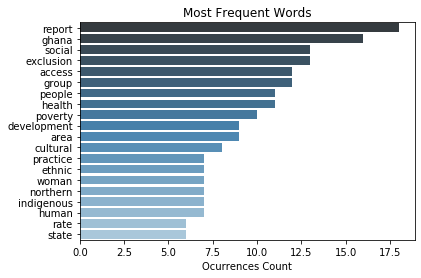

In [8]:
sns.barplot(x=words.values, y=words.index, palette="Blues_d", linewidth=0)
plt.xlabel("Ocurrences Count")
plt.title("Most Frequent Words")
plt.show()

In [9]:
positive_words = []
negative_words = []
with open("positive-words.txt", "r") as temp_file:
    positive_words = temp_file.read().splitlines()
    

with open("negative-words.txt", "r", encoding = "ISO-8859-1") as temp_file:
    negative_words = temp_file.read().splitlines()


In [10]:
data_list = [["text", "score"]]

for sent in doc.sents:

    if len(sent.text) > 10:

        score = 0

        for word in sent:

            if word.lower_ in positive_words:
                score += 1

            if word.lower_ in negative_words:
                score -= 1

        data_list.append([sent.text, score])

csv.writer(open("./sentences csv files/ghana_sentences.csv", "w", encoding="utf-8",
                newline="")).writerows(data_list)

In [11]:
df = pd.read_csv("./sentences csv files/ghana_sentences.csv")

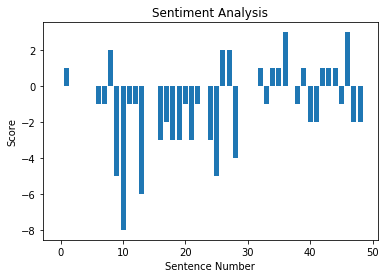

In [12]:
plt.bar(df.index, df["score"], linewidth=0)
plt.xlabel("Sentence Number")
plt.ylabel("Score")
plt.title("Sentiment Analysis")
plt.show()